# Task 4

In [2]:
import pandas as pd
import seaborn as sns

In [5]:
from project_functions1 import load_and_process
dfKennedy = load_and_process("../data/processed/cleanedf1data.csv")

In [7]:
from project_functions2 import load_and_process
dfJordan = load_and_process("../data/processed/cleanedf1data.csv")

In [4]:
from project_functions3 import load_and_process
dfEvan = load_and_process("../data/processed/cleanedf1data.csv")

# How has Point Distribution Differed Throughout the Seasons of F1?

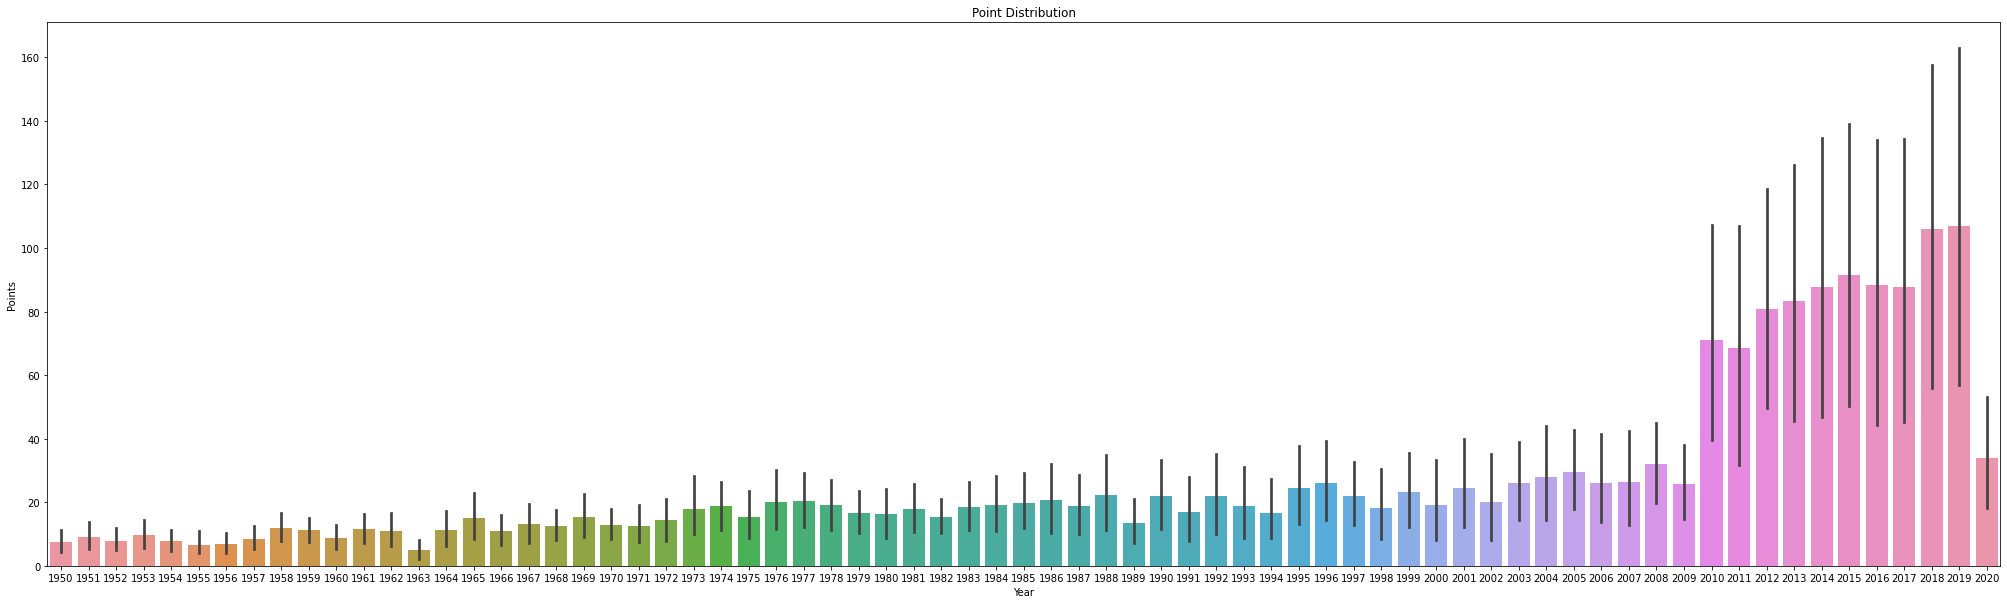

In [12]:
p= sns.barplot(x="Year", y="Points", data=dfKennedy)
p.set(ylabel="Points", title="Point Distribution")
p.figure.set_size_inches(35,10)

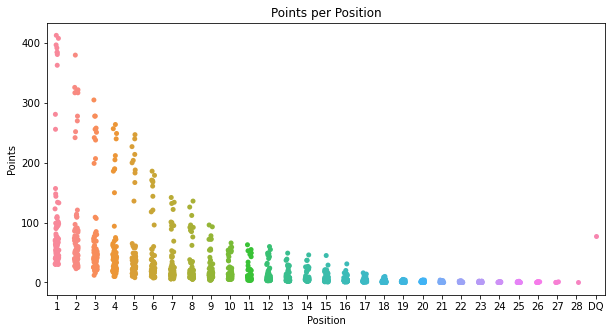

In [15]:
s2=sns.stripplot(data=dfKennedy, x="Position", y="Points",order=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','DQ'])
s2.set(xlabel="Position", ylabel="Points", title="Points per Position")
s2.figure.set_size_inches(10,5)

The first visualization shows a clear jump in point allocation in the year of 2010, where as up until then, there was a quite slow upward growing trend, implying that there is a larger number of points being given out per race in the years of 2010 and proceeding, than that prior to 2010. We can also see that 2020 appears to be an outlier, this can be due to the fact that at the time of this dataset, the 2020 F1 season had not yet concluded.

The second visualization displays the total points allocated per position each year. It should be noted that since there is not a fixed number of racers every year, there are some positions that will not have scores each year. There is also notably a special consideration of a DQ, disqualification, one year. As expected, we can see that there are a higher number of points distributed to the higher positions which makes sense considering it is the reward for earning the position.

It is interesting however, that there almost appears to be 2 unique patterns between position 1 and 10 in the second visualization. We can see the lower portion which is much more saturated and 1 is around 150, and an upper portion which is less saturated and 1 is around 400. Based on our first visualization which showed that after 2010, there was a higher point average, we can theorize that the lower portion of our scatter plot is the earlier years of F1, and the upper portion is years after 2010. The comparison of these two visualizations allows us to come to the conclusion that there are indeed more points being allocated per position starting in the year of 2010.

# What Nationality has Produced the Best Drivers?

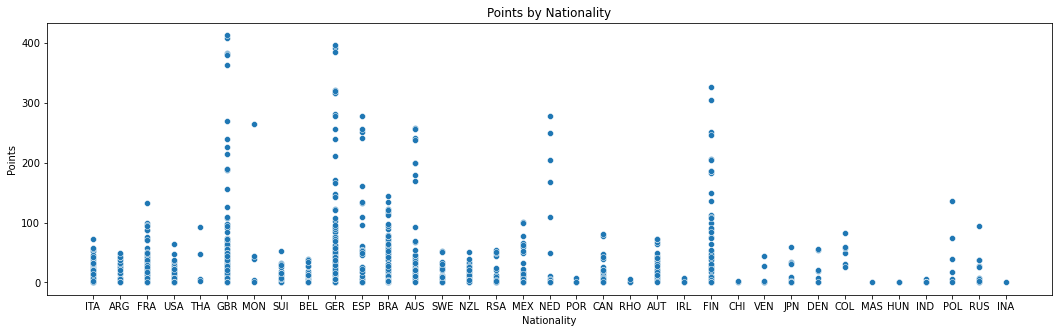

In [19]:
s=sns.scatterplot(data=dfJordan, x="Nationality", y="Points")
s.set(ylabel="Points", title="Points by Nationality")
s.figure.set_size_inches(18,5)

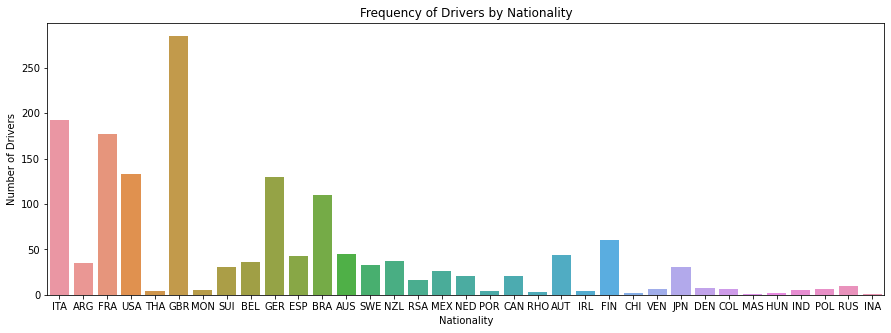

In [21]:
c = sns.countplot(x="Nationality", data=dfJordan)
c.set(ylabel="Number of Drivers", title="Frequency of Drivers by Nationality")
c.figure.set_size_inches(15,5)

### Highest Cummulative Points:

In [29]:
dfNation = dfJordan.groupby(["Nationality"]).Points.sum().reset_index()
dfNation[dfNation["Points"]==dfNation["Points"].max()]

,Nationality,Points
12,GBR,9092.2


### Most Drivers:

In [8]:
dfDriver = dfJordan.groupby(["Nationality"]).Driver.count().reset_index()
dfDriver[dfDriver["Driver"]==dfDriver["Driver"].max()]

,Nationality,Driver
12,GBR,285


Looking at the "Points by Nationality", visualization, we can clearly see which nationalities have the highest scores. The top three scoring nationalities are GBR (Great Britian), GER (Germany), and FIN (Finland) but they also appear to have the most data points. Expanding on this, we wanted to explore how many data points existed for each Nationality. This is important as it indicates how many drivers raced for each nationality. We can see in the "Frequency of Drivers by Nationality" visual that similarly, Great Britian has the highest number of drivers with over 250 but Germany and Finland have a much lower number of drivers. Instead ITA (Italy), FRA (France), and USA (United States) have a much higher number of drivers in comparison.

Looking into exactly how many points Great Britian has scored, we can see that they have scored nearly 9100 points in total and have done so with 285 drivers. The high cummulative score is largely contributed to their number of drivers rather than a dominance of their drivers since German and Finnish drivers have been able to achieve similar high scores.

# What Teams are the Highest Cumulative Scoring Throughout History?

### Highest Cumulative points by Teams

In [30]:
dfTeam = dfEvan.groupby(["Team"]).Points.sum().reset_index()
dfTeam[dfTeam["Points"]==dfTeam["Points"].max()]

,Team,Points
47,Ferrari,9096.1


### Total Drivers in History

In [35]:
dfTime = dfEvan.groupby(["Team"]).Year.count().reset_index()
dfTime.sort_values("Year").reset_index()
dfTime[dfTime["Year"]==dfTime["Year"].max()]

,Team,Year
47,Ferrari,197


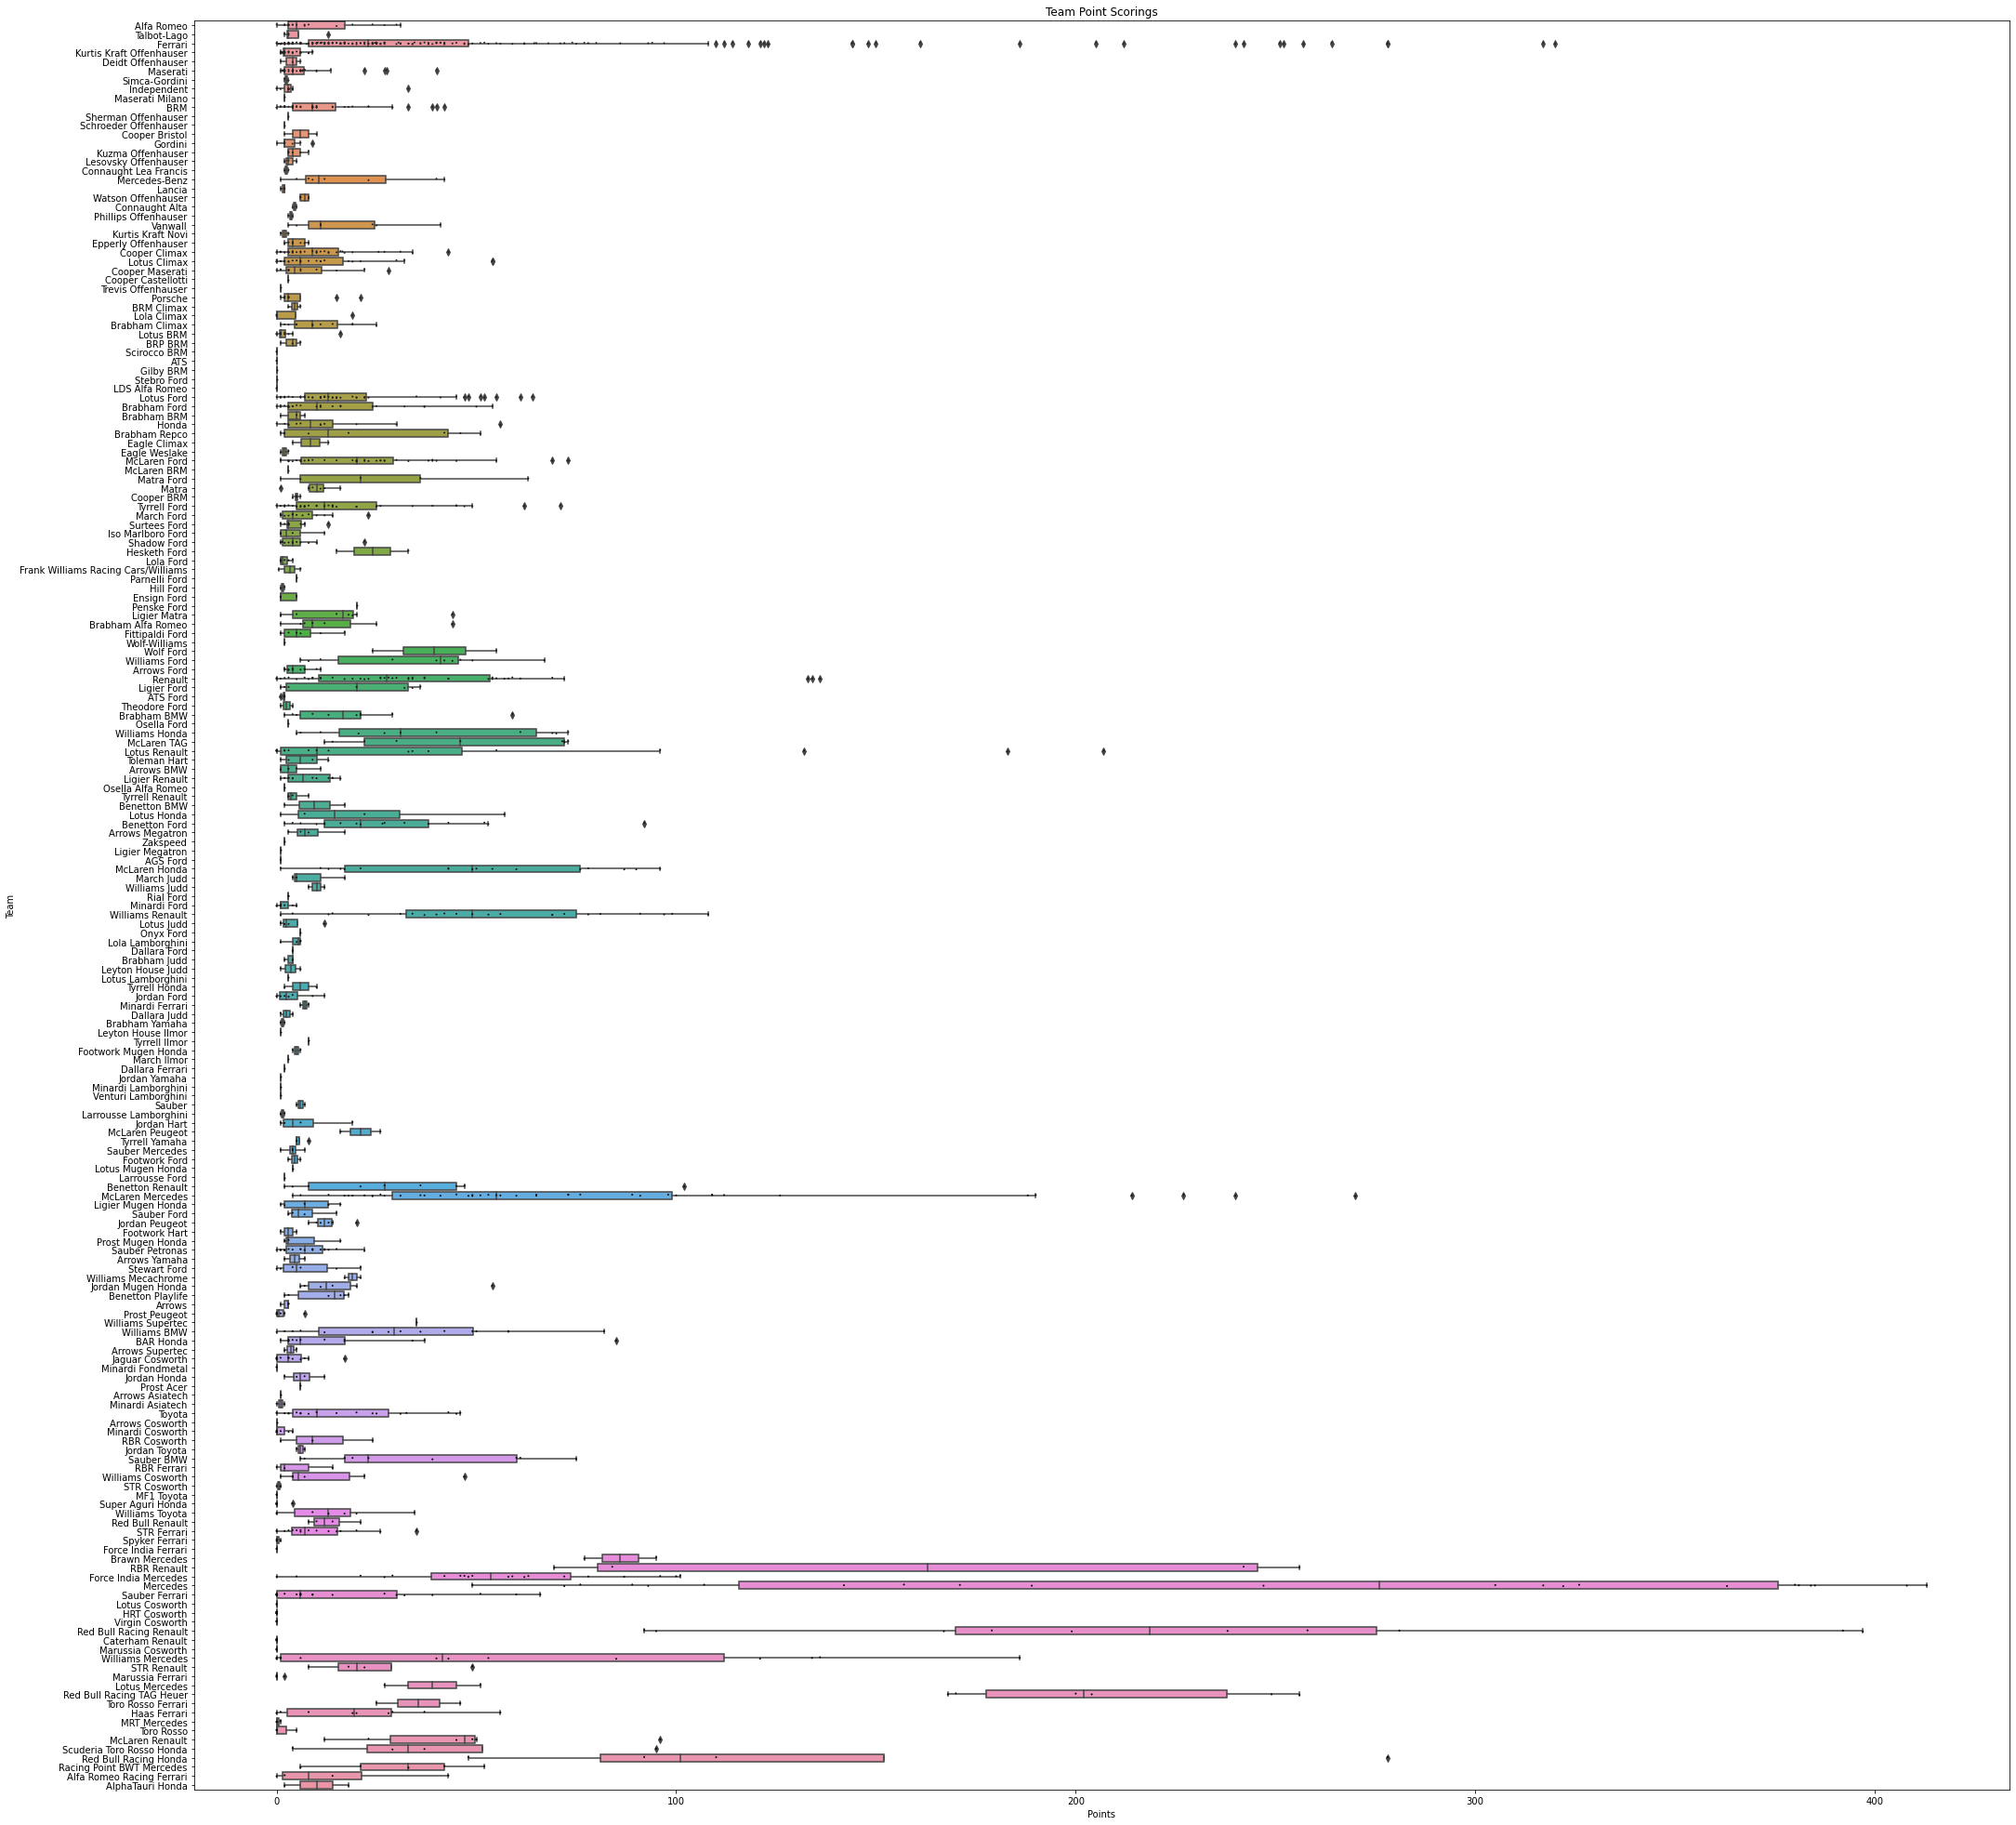

In [27]:
b = sns.boxplot(x="Points", y="Team", data=dfEvan)
b = sns.stripplot(x="Points", y="Team", data=dfEvan, size=2, palette="dark:black")
b.set(title="Team Point Scorings")
b.figure.set_size_inches(35, 35)

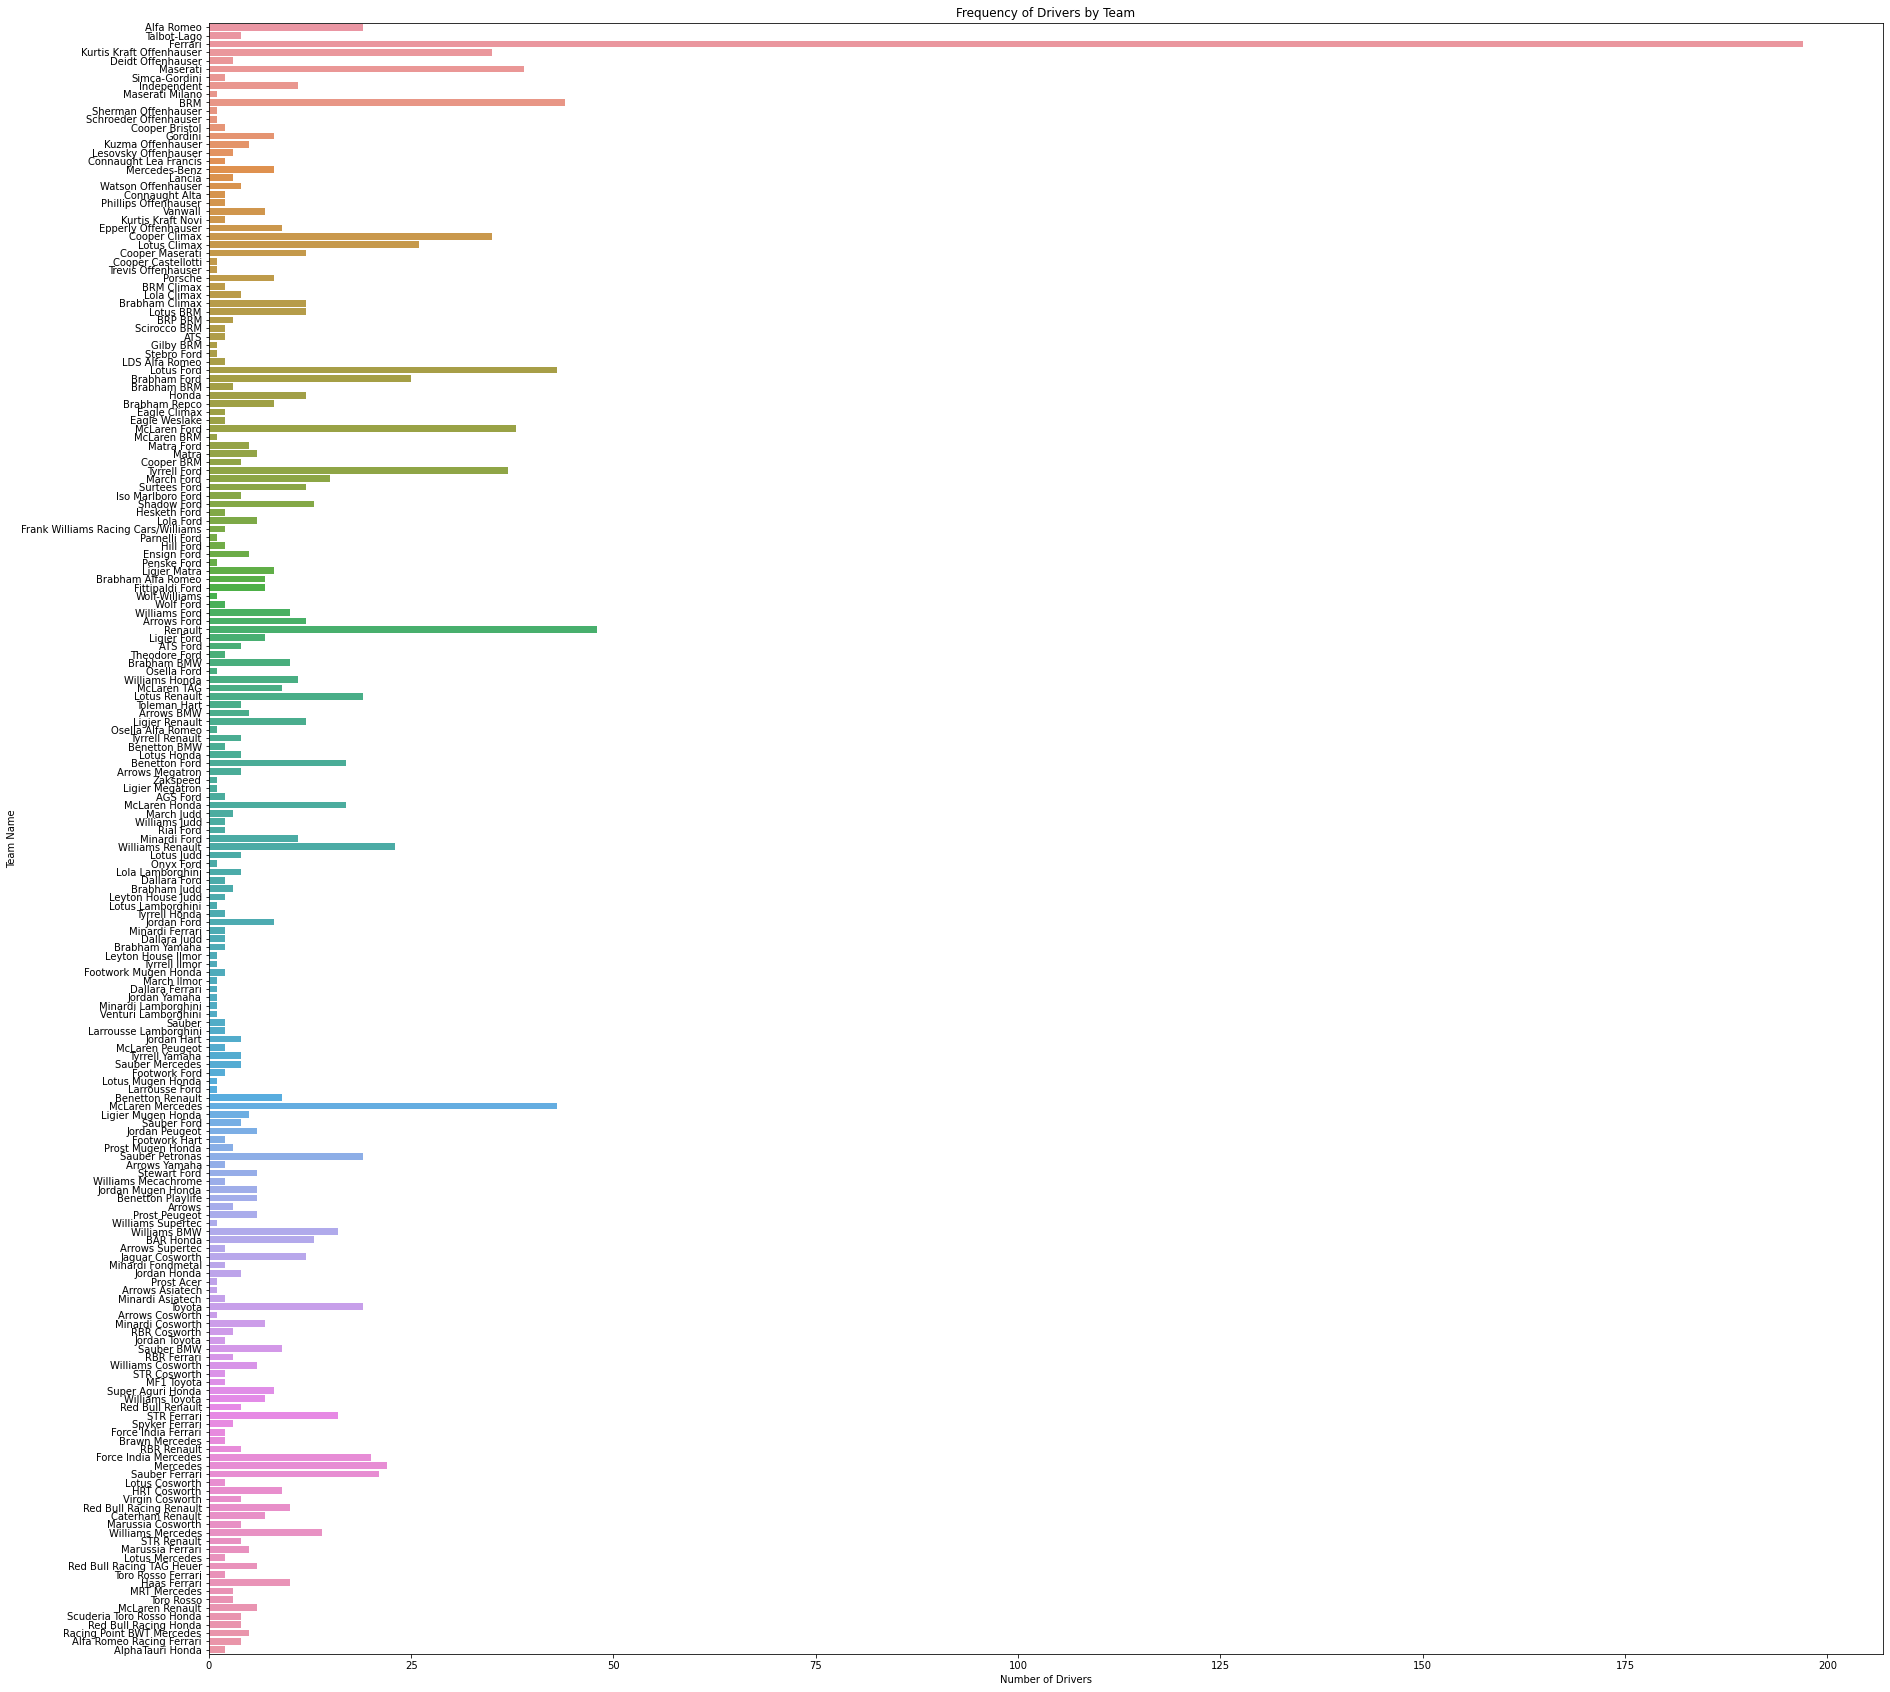

In [5]:
h = sns.countplot(y="Team", data=dfEvan)
h.set(ylabel="Team Name", xlabel="Number of Drivers", title="Frequency of Drivers by Team")
h.figure.set_size_inches(30,30)

Overall, Ferrari has scored the most cumulative points in history, scoring a total of 9096 points. This is largely due to their long time existance in F1, over the 70 years of data, they have had nearly 200 drivers.

Although these visualizations take a bit of zooming in to see, the first one clearly shows the distribution of the scores for each team well. We see Ferrari having the most data, while also having the most plots outside of their average range. This clearly indicates how they have experienced the benefits of the most total points while also not having the best overall driving, which plots their top drivers outside of their normal distribution. Where in the reverse, a team such as Mercedes, they have scored very high and continually place as a top team which boosts their overall total in points. 

Looking into the second visualization, we can confirm the assumption from the previous visualization, that team Ferrari has had the most drivers which has led their top drivers scores to fall outside of their normal distribution. We also see team Mercedes, which has a much higher normal distribution of score, with a lower number of drivers, which indicates how impressive they have been since their F1 debut. 

There are also several teams that score very low which is indicative of the turnover rate within F1 racing over the years. It indicates that if a team has a poor performance in their debut, and no quick improvement, they lose sponsors and get replaced relatively quickly. This can be seen with teams such as Prost Acer, Toro Rosso, and ZakSpeed, as they have very few drivers in history. As well, we see the high team turnover rates as there have been a significant number of teams in the history, many with few drivers to have competed and a very, very low normal point distribution. 

# How has the Number of Drivers Varied each Season in F1?

We want to compare the number of drivers per year, but the dataset didn't allow to directly do that, so below, we will be creating a new dataframe that consists of two columns; "Year" and "Driver Count". We will clean the data copied from f1data, and only keep the first presence (remove duplicates) of each year and it's distinct driver count so that we are able to create a visualization of the distinct count of driveres per year.

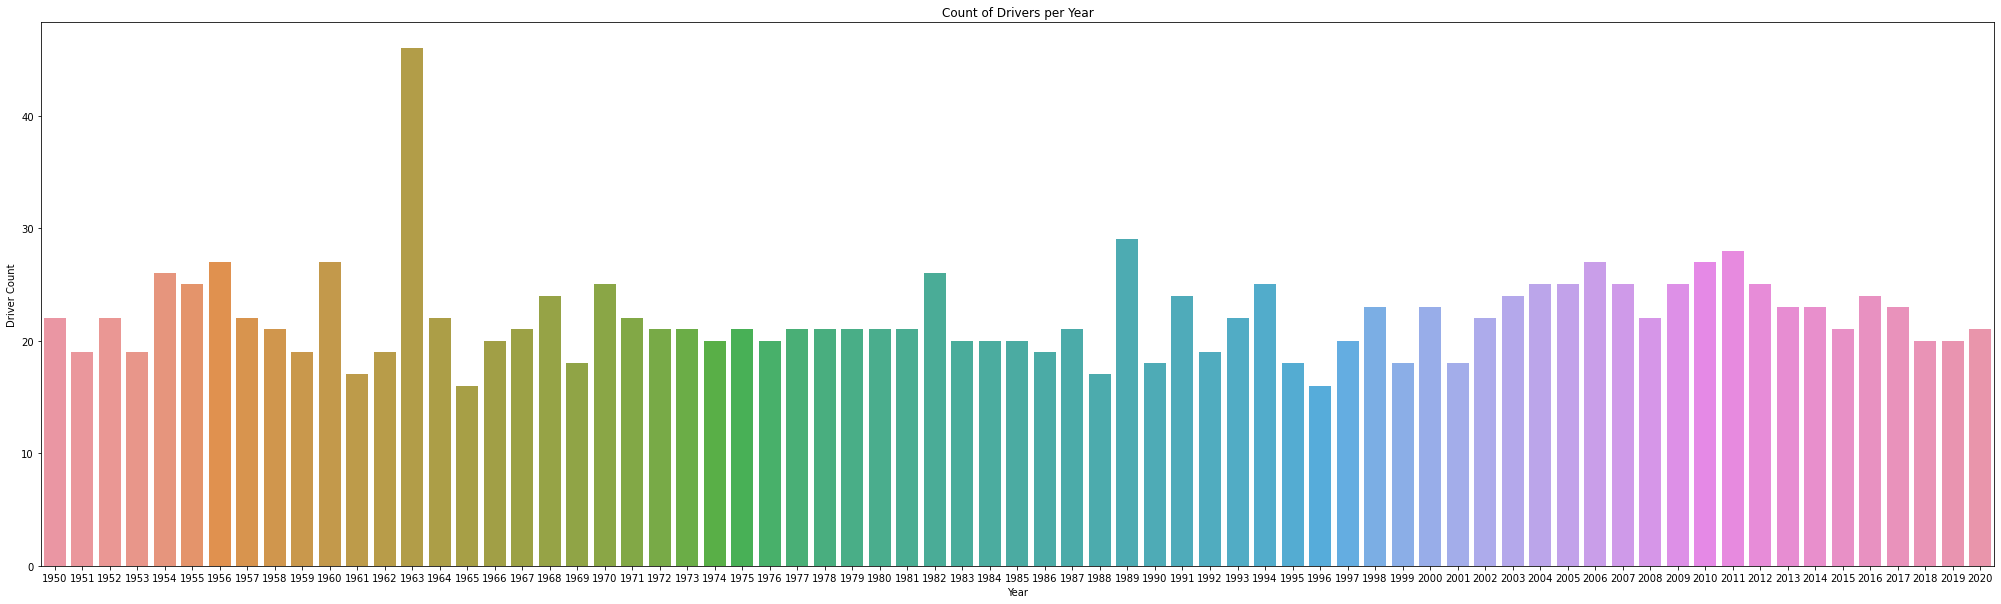

In [18]:
data = dfKennedy

data['Driver Count'] = data.groupby('Year')['Year'].transform('count')
data2 = [data["Year"], data["Driver Count"]]
headers = ["Year", "Driver Count"]

driver_count = pd.concat(data2, axis=1, keys=headers)
driver_count.drop_duplicates(subset ="Year", keep = "first", inplace = True)
driver_count = driver_count.reset_index()
driver_count = driver_count.drop(columns=["index"])

bar_dpy = sns.barplot(x="Year", y="Driver Count", data=driver_count)
bar_dpy.set(title = 'Count of Drivers per Year')
bar_dpy.figure.set_size_inches(35,10)

The above visualization clearly shows us that the distinct number of drivers per year (season) stayed relativedly the same over the 70 year history of F1. It appears that the average number of drivers sat around 25-30 per year. The clear outlier lays in the year of 1963, with almost 50 drivers. We can speculate that there were a large number of alternate drivers that year, rather than sticking to a few main drivers for each team, which could be due to rebranding or rebuilding within the teams.